In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


class Model_a(nn.Module):
    def __init__(self):
        super(Model_a, self).__init__()
        # 3层都为全连接层，4输入，3输出
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.float()
        #激活函数为ReLU
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Model_b(nn.Module):
    def __init__(self):
        super(Model_b, self).__init__()
        # 3层都为全连接层，4输入，3输出
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.float()
        #激活函数为Softplus
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = self.fc3(x)
        return x


class Model_c(nn.Module):
    def __init__(self):
        super(Model_c, self).__init__()
        # 3层都为全连接层，4输入，3输出
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.float()
        #激活函数为Sigmoid
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [2]:
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


#读入数据
iris = np.loadtxt("iris.data", delimiter=',', converters={4: iris_type})
np.random.shuffle(iris)  #打乱
num = iris.shape[0]  #数据总数
dim = iris.shape[1] - 1  #维数
training_num = round(num * 4 / 5)  #80%训练、20%测试
test_num = num - training_num
training_set = iris[0:training_num]
test_set = iris[training_num:num]
training_set = torch.tensor(training_set)  #数据类型转化
test_set = torch.tensor(test_set)

In [3]:
def Processing_test_data():
    #测试数据集，计算错误率
    prediction = model(test_set[:, :-1])
    loss_ = criterion(prediction, test_set[:, -1].long())
    prediction = torch.argmax(prediction, dim=1)  #整理预测出的值

    error = 0
    for i in range(test_num):
        if test_set[i, -1].item() != prediction[i].item():
            error += 1

    return loss_.item(), error / test_num


def Get_training_error(pred):
    pred = torch.argmax(pred, dim=1)
    error = 0
    for i in range(training_num):
        if training_set[i, -1].item() != pred[i].item():
            error += 1
    return error / training_num

KeyboardInterrupt: 

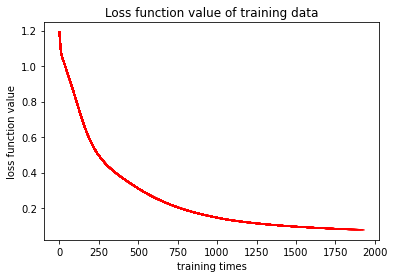

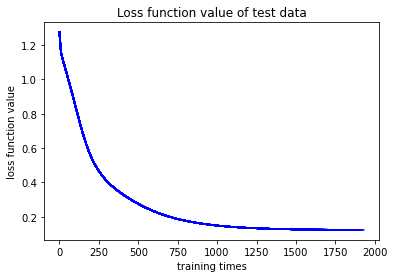

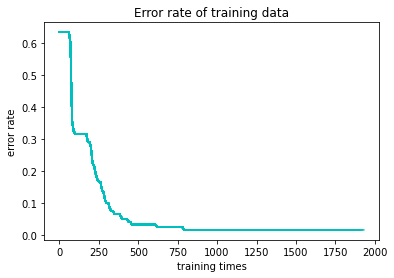

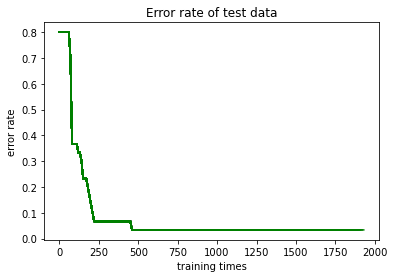

In [4]:
error_rate1, error_rate2 = [], []
episodes = []
loss_value1 = []
loss_value2 = []
avg_length = 10

model = Model_a()  #可更改为Model_a()/Model_b()/Model_c()
criterion = nn.CrossEntropyLoss()  #采用交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)  #使用SGD优化器，学习率为0.005

for e in range(3000):  #训练数据集，调整参数
    optimizer.zero_grad()  #零梯度缓冲
    output = model(training_set[:, :-1])
    loss = criterion(output, training_set[:, -1].long())  #计算损失函数

    loss.backward()
    optimizer.step()  #更新
    #作图
    if e % avg_length == 0:  #每十次记一回数
        episodes.append(e)

        loss_value1.append(loss.item())
        error_rate1.append(Get_training_error(output))

        value2, rate2 = Processing_test_data()
        loss_value2.append(value2)
        error_rate2.append(rate2)

        plt.figure(1)
        plt.title("Loss function value of training data")
        plt.xlabel("training times")
        plt.ylabel("loss function value")
        plt.plot(episodes, loss_value1, 'r')

        plt.figure(2)
        plt.title("Loss function value of test data")
        plt.xlabel("training times")
        plt.ylabel("loss function value")
        plt.plot(episodes, loss_value2, 'b')

        plt.figure(3)
        plt.title("Error rate of training data")
        plt.xlabel("training times")
        plt.ylabel("error rate")
        plt.plot(episodes, error_rate1, 'c')

        plt.figure(4)
        plt.title("Error rate of test data")
        plt.xlabel("training times")
        plt.ylabel("error rate")
        plt.plot(episodes, error_rate2, 'g')

    if loss.item() < 0.01:
        break

In [ ]:
#print结果
prediction = model(test_set[:, :-1])
prediction = torch.argmax(prediction, dim=1)

error = 0
for i in range(test_num):
    if test_set[i, -1].item() != prediction[i].item():
        error += 1

print("真实值为", np.array(test_set[:, -1]))
print("预测值为", np.array(prediction))
print("错误率为", error / test_num)